<a target="_blank" href="https://colab.research.google.com/github/giordamaug/WisardLib4Python/blob/main/test_classifier.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Installation

In [ ]:
!git clone https://github.com/giordamaug/WisardLib4Python.git
%cd WisardLib4Python
!pip install pybind11
!python setup.py build_ext --inplace 

## Load the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
from sklearn import preprocessing
target = "medv"
X = np.array(df.drop(target, axis=1))
y = df[target].values
max(y)

50.0

## Cross validation

10-fold Cross Validation...
--- 0.05002284049987793 seconds ---
WiSARDRegressor(n_tics: 128, n_bits:, 32, n_rams: 0)

R2 0.47765822918406897


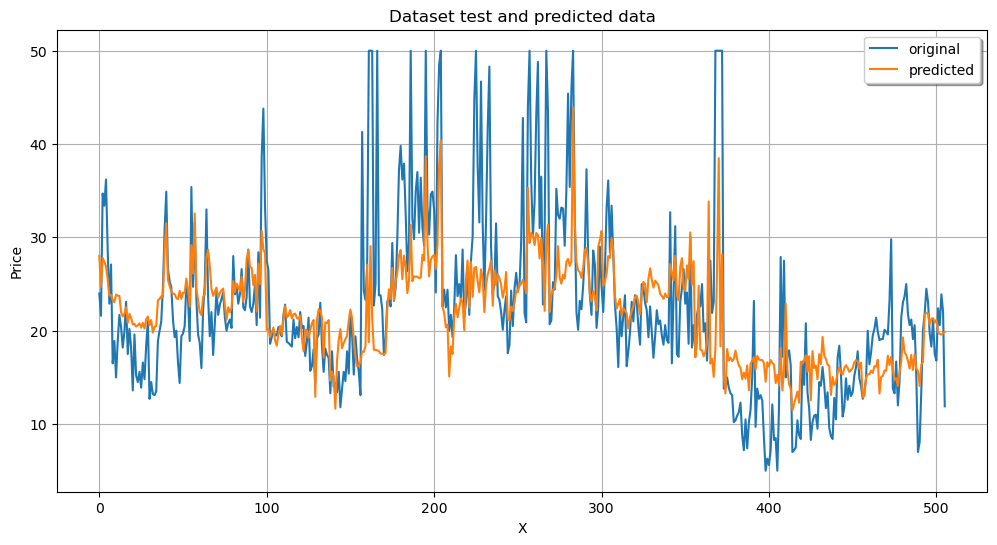

In [3]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict
from sklearnapi import WiSARDRegressor
import matplotlib.pyplot as plt
import time 
regr = WiSARDRegressor(n_bits=32, n_tics=128,random_state=0, code='t', debug=False)
start = time.time()
folds = 10
print(f"{folds}-fold Cross Validation...")
y_pred = cross_val_predict(regr, X, y, cv=folds)
targets = y
print("--- %s seconds ---" % (time.time() - start))
print(f'{regr}')
print(f"R2 {metrics.r2_score(targets, y_pred)}")
x_ax = range(len(targets))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, targets, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

10-fold Cross Validation...
--- 0.014966011047363281 seconds ---
WiSARDRegressor(n_tics: 128, n_bits:, 32, n_rams: 52)

R2 0.742583960902182


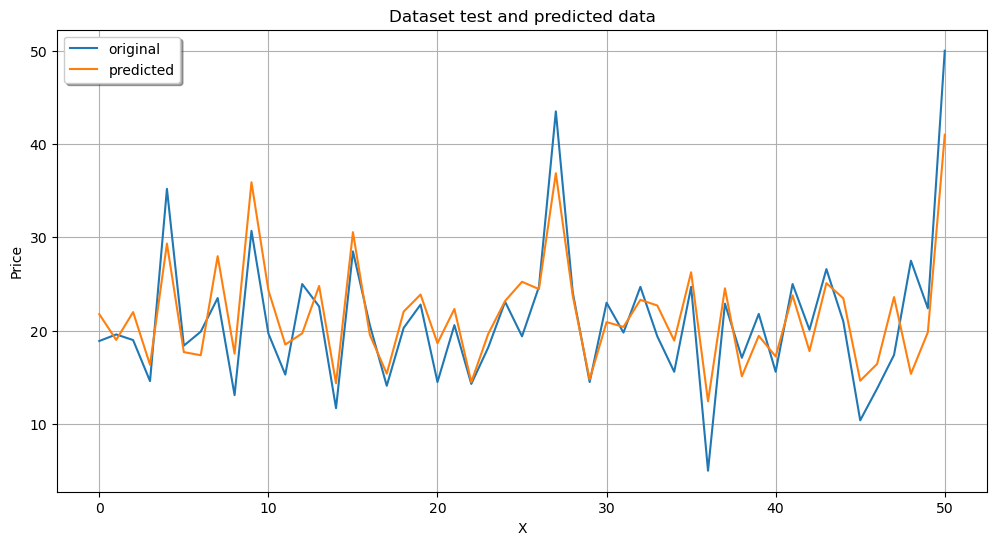

In [4]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearnapi import WiSARDRegressor
import matplotlib.pyplot as plt
import time 
regr = WiSARDRegressor(n_bits=32, n_tics=128,random_state=0, code='t', debug=False)
start = time.time()
print(f"{folds}-fold Cross Validation...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10 / 100.0) 
y_pred = regr.fit(X_train, y_train).predict(X_test)
targets = y_test
print("--- %s seconds ---" % (time.time() - start))
print(f'{regr}')
print(f"R2 {metrics.r2_score(targets, y_pred)}")
x_ax = range(len(targets))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, targets, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  